# Proyecto de Mineria de Datos #
## CodelCOVID-19##
### Analisis exploratorio de datos###

En este documento se realizara el analisis exploratorio de datos de dos tipos de dataset:
* Dataset de el valor de criptomoneda por fecha
* Dataset de cantidad de contagiados por dia de diferentes paises del mundo ordenados alfabeticamente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [3]:
df_eth=pd.read_csv("dataset_eth.csv")
df_btc= pd.read_csv("dataset_btc.csv")

df_eth = df_eth.drop(0).reset_index(drop=True)

In [19]:
data_covid=pd.read_csv("covid.csv")
data_covid=data_covid.groupby(["countriesAndTerritories"])
data_covid.head(1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14-07-2020,14,7,2020,4,2,Afghanistan,AF,AFG,38041757,Asia,8.456497
187,14-07-2020,14,7,2020,117,2,Albania,AL,ALB,2862427,Europe,38.603605
315,14-07-2020,14,7,2020,494,7,Algeria,DZ,DZA,43053054,Africa,14.210374
507,14-07-2020,14,7,2020,3,0,Andorra,AD,AND,76177,Europe,3.938197


In [38]:
data_covid=pd.read_csv("covid.csv")
fecha=pd.to_datetime(data_covid["dateRep"])

datetime_index = pd.DatetimeIndex(fecha.values) 
data_covid = data_covid.set_index(datetime_index)
data_covid = data_covid.drop(columns=["dateRep"])
#data_covid["dateRep"]=fecha
#data_covid.dtypes
data_covid

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2020-07-14,14,7,2020,4,2,Afghanistan,AF,AFG,38041757,Asia,8.456497
2020-07-13,13,7,2020,0,0,Afghanistan,AF,AFG,38041757,Asia,9.158357
2020-12-07,12,7,2020,85,16,Afghanistan,AF,AFG,38041757,Asia,10.081028
2020-11-07,11,7,2020,458,37,Afghanistan,AF,AFG,38041757,Asia,10.291323
2020-10-07,10,7,2020,255,20,Afghanistan,AF,AFG,38041757,Asia,9.812901
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,18,3,2020,0,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-17,17,3,2020,9,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-16,16,3,2020,3,0,Andorra,AD,AND,76177,Europe,NaN
2020-03-14,14,3,2020,1,0,Andorra,AD,AND,76177,Europe,NaN


In [4]:
fecha = pd.to_datetime(df_btc['Date'])
datetime_index = pd.DatetimeIndex(fecha.values) 
df_eth = df_eth.set_index(datetime_index).drop(['Date'],axis=1)
df_btc = df_btc.set_index(datetime_index).drop(['Date'],axis=1)


In [5]:
df_eth.head(10)

,Open,High,Low,Close,Volume,Market Cap
2020-07-13,242.18,244.31,238.23,239.60,7787751468,26775071858
2020-07-12,239.46,243.31,237.77,242.13,6596394718,27054158346
2020-07-11,241.04,241.53,238.33,239.46,5643067316,26752161985
2020-07-10,242.87,242.88,236.73,240.98,7281370522,26919422187
2020-07-09,246.75,247.29,239.90,243.02,8429099199,27143016879
2020-07-08,239.16,248.31,238.40,246.67,9892586411,27547785703
2020-07-07,240.97,242.68,234.22,239.08,6441497597,26696376073
2020-07-06,227.69,242.13,227.03,241.51,8782917553,26964937043
2020-07-05,228.98,229.86,224.54,227.66,5292172429,25415950649
2020-07-04,225.29,230.05,225.13,229.07,5228310135,25570190315


In [6]:
df_btc.head(10)

,Open,High,Low,Close,Volume,Market Cap
2020-07-13,9277.20,9306.40,9224.29,9243.61,17519821266,170379677119
2020-07-12,9241.06,9319.42,9197.45,9276.50,14452361907,170977422928
2020-07-11,9277.51,9293.53,9199.49,9240.35,13249910444,170302234778
2020-07-10,9273.36,9287.47,9118.00,9278.81,16860035605,171001933827
2020-07-09,9427.99,9431.38,9235.00,9277.97,18000702524,170977231638
2020-07-08,9253.02,9450.34,9249.50,9428.33,19702359883,173738543115
2020-07-07,9349.16,9360.62,9201.82,9252.28,13839652595,170485472276
2020-07-06,9072.85,9375.47,9058.66,9375.47,17889263252,172746103840
2020-07-05,9126.09,9162.18,8977.02,9073.94,12903406143,167181726154
2020-07-04,9084.23,9183.30,9053.63,9132.49,12290528515,168251076678


## 3 - Graficos de contagios ##
### 3.1 - Por Pais ###

Lo primero que se realiza es un manejo del dataset para un mejor manejo de los datos

In [96]:
data_covid=pd.read_csv("dataset covid")

#Se genera la fecha en el formato de datetime
fecha=pd.to_datetime(data_covid["dateRep"],format="%d/%m/%Y")#"%d-%m-%Y")
#Se transforma a indice de tiempo los valores generados anteriormente
datetime_index = pd.DatetimeIndex(fecha.values) 
#Se setea como indice datetime_index
data_covid = data_covid.set_index(datetime_index)
#data_covid = data_covid.drop(columns=["dateRep"])
data_covid=data_covid.pivot(columns="countriesAndTerritories",values="cases").fillna(0)
data_covid.iloc[0].max()

27.0

Luego de tener la data estandarizada como las necesitamos se procede a graficar

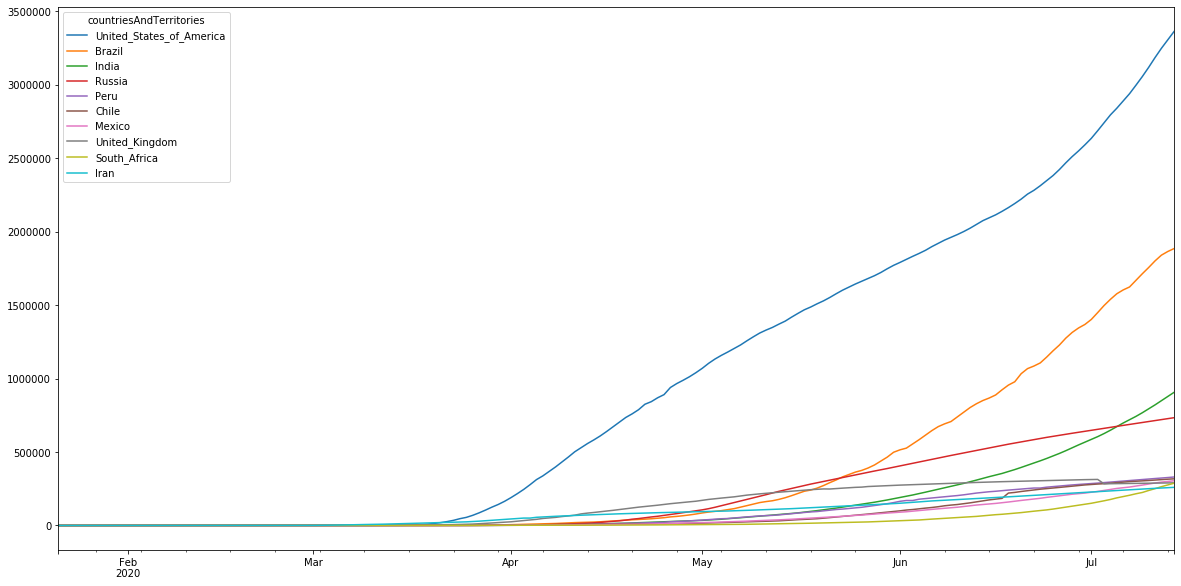

In [71]:
import numpy as np
#Data de casos acumulativos
d=data_covid.cumsum()
#Ordenamiento de datos de mayor a menor, mediante el ultimo valor "index.values[-1]" 
max_val=d.sort_values(by=d.index.values[-1], axis=1,ascending=False)
#Extraccion de 10 paises con mayor cantidad de contagios acumulativos
paises_max=max_val.iloc[:,0:10]

#Extraccion de filas con 0
bool_df = (paises_max != 0).any(axis=1)
paises_max = paises_max.loc[bool_df]
paises_max.plot(figsize=(20,10))

### 3.2 - Por Continente ###

In [102]:
data_covid=pd.read_csv("dataset covid")

#Se genera la fecha en el formato de datetime
fecha=pd.to_datetime(data_covid["dateRep"],format="%d/%m/%Y")#"%d-%m-%Y")
#Se transforma a indice de tiempo los valores generados anteriormente
datetime_index = pd.DatetimeIndex(fecha.values) 
#Se setea como indice datetime_index
data_covid = data_covid[["continentExp","cases"]]
data_covid["date"]=fecha

data_continent=data_covid.groupby(["date","continentExp"]).sum()["cases"].unstack().fillna(0)
data_continent

continentExp,Africa,America,Asia,Europe,Oceania,Other
date,,,,,,
2019-12-31,0.0,0.0,27.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,17.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-07-10,18766.0,139717.0,54620.0,15329.0,176.0,0.0
2020-07-11,17120.0,143140.0,55132.0,14356.0,303.0,0.0
2020-07-12,19128.0,130537.0,54446.0,13870.0,197.0,0.0


continentExp,Africa,America,Asia,Europe,Oceania,Other
date,,,,,,
2019-12-31,0.0,0.0,27.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,27.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,27.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,44.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,44.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-07-10,542312.0,6406420.0,2741451.0,2544683.0,10707.0,696.0
2020-07-11,559432.0,6549560.0,2796583.0,2559039.0,11010.0,696.0
2020-07-12,578560.0,6680097.0,2851029.0,2572909.0,11207.0,696.0


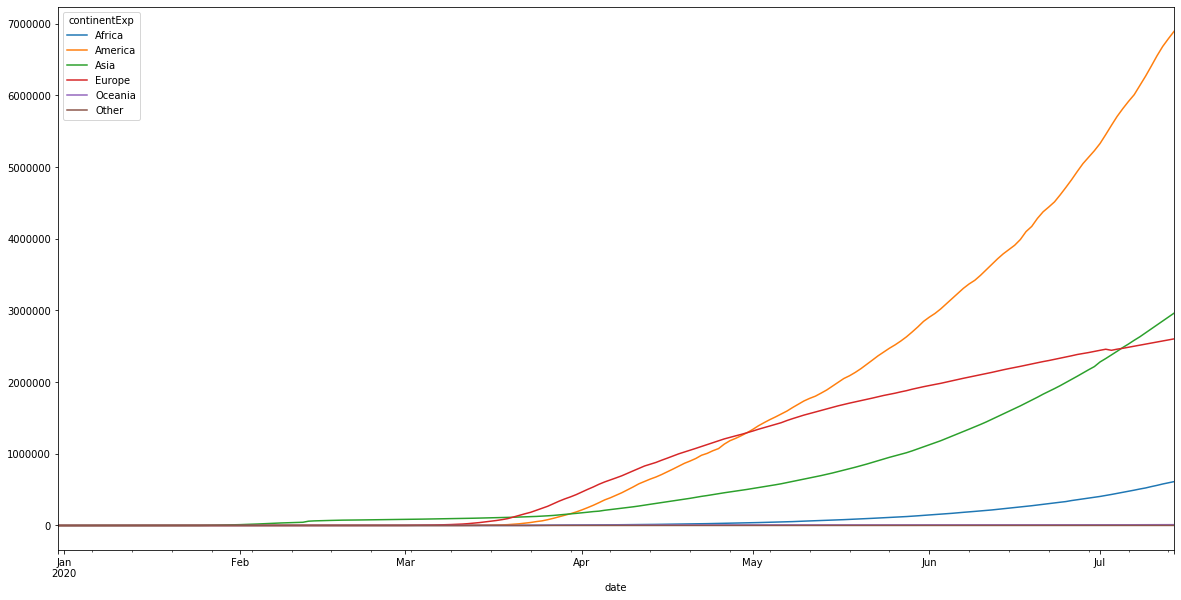

In [105]:
data_continent_sum=data_continent.cumsum()
data_continent_sum.plot(figsize=(20,10))
data_continent_sum

### 4. Graficos de criptomonedas

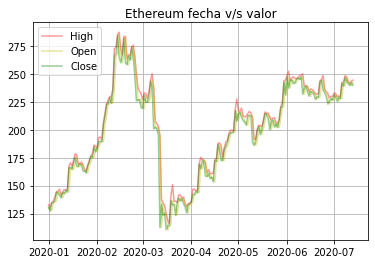

In [12]:
grafico_eth=plt.figure()
plt.grid(True)
plt.title('Ethereum fecha v/s valor')
plt.plot(df_eth.index,df_eth['High'],c='r',alpha=0.4,label='High')
#plt.plot(df_eth.index,df_eth['Low'],c='b',alpha=0.4,)
plt.plot(df_eth.index,df_eth['Open'],c='y',alpha=0.4,label='Open')
plt.plot(df_eth.index,df_eth['Close'],c='g',alpha=0.4,label='Close')
plt.legend()

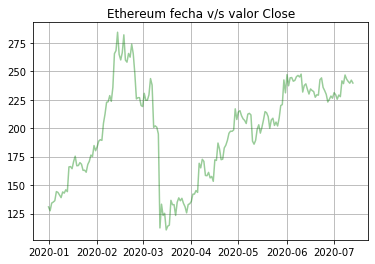

In [8]:
grafico_eth_close=plt.figure()
plt.grid(True)
plt.title('Ethereum fecha v/s valor Close')
plt.plot(df_eth.index,df_eth['Close'],c='g',alpha=0.4)

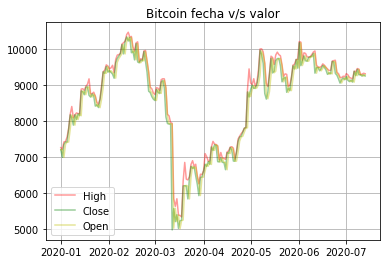

In [9]:
grafico_btc = plt.figure()
plt.grid(True)
plt.title('Bitcoin fecha v/s valor')
plt.plot(df_btc.index,df_btc['High'],c='r',alpha=0.4,label='High')
#plt.plot(df_btc.index,df_btc['Low'],c='b',alpha=0.4,)
plt.plot(df_btc.index,df_btc['Close'],c='g',alpha=0.4,label='Close')
plt.plot(df_btc.index,df_btc['Open'],c='y',alpha=0.4,label='Open')
plt.legend()

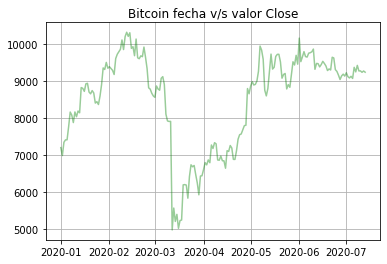

In [10]:
grafico_eth_close=plt.figure()
plt.grid(True)
plt.title('Bitcoin fecha v/s valor Close')
plt.plot(df_btc.index,df_btc['Close'],c='g',alpha=0.4)